# Question 2

(a)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Setup
# Basic inputs for bonds and stocks

# Mean
SB_mean = np.array([[0.1], [0.05]])

# Variance-Covariance Matrix
SB_Sigma = np.array([[0.2**2, 0.0004], [0.0004, 0.08**2]])

# Vector of ones
ones2 = np.ones((2, 1))

# Inverse of the variance-covariance matrix
SB_invSigma = np.linalg.inv(SB_Sigma)


In [8]:
# Define vectors for weights: Stock = (0,1)^t and Bond = (1,0)^t
E_w = np.array([[1], [0]])  # Bond
B_w = np.array([[0], [1]])  # Stock

# Create many portfolios as a combination of stock and bond

# Possible combinations of weights
y = np.arange(-10, 10.01, 0.01)  # Create a sequence from -10 to 10 with step 0.01

# Convert y to a 2D array where each row is a weight for a portfolio
y = y.reshape(1, -1)
port = np.dot(B_w, y) + np.dot(E_w, (1 - y))

# Compute expected returns
port_mean = np.dot(port.T, SB_mean)

# Compute var-covar matrix of portfolio returns (we will only use the variances on the main diagonal)
port_var = np.diag(np.dot(np.dot(port.T, SB_Sigma), port))
port_vol = np.sqrt(port_var).reshape(len(port_var), 1)

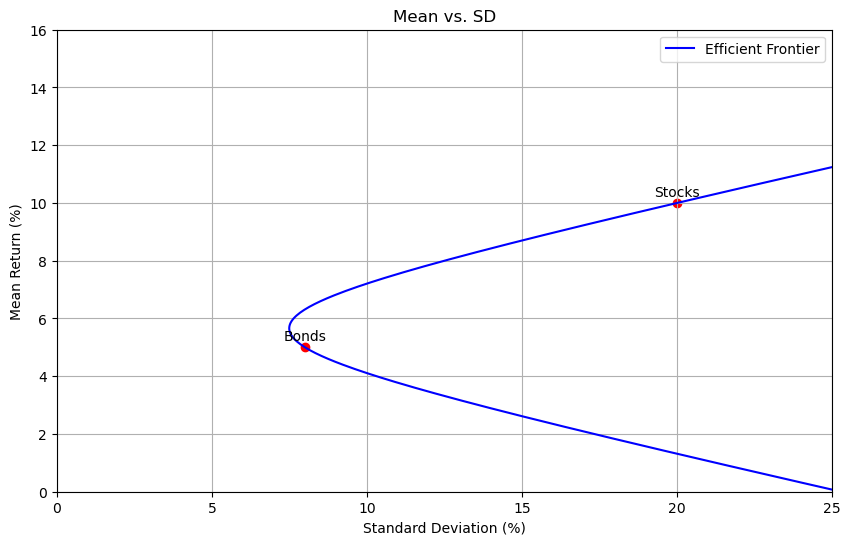

In [9]:
# Plot MV
plt.figure(figsize=(10, 6))
plt.plot(port_vol * 100, port_mean * 100, 'b-', label='Efficient Frontier')
plt.title("Mean vs. SD")
plt.xlabel("Standard Deviation (%)")
plt.ylabel("Mean Return (%)")
plt.xlim(0, 25)
plt.ylim(0, 16)

# Add points for stock and bond funds
plt.scatter(np.sqrt(np.diag(SB_Sigma)) * 100, SB_mean * 100, color='red')
SB_labels = ["Stocks", "Bonds"]

# Annotate points
for i, txt in enumerate(SB_labels):
    plt.annotate(txt, (np.sqrt(np.diag(SB_Sigma))[i] * 100, SB_mean[i] * 100), textcoords="offset points", xytext=(0, 5), ha='center')

plt.legend()
plt.grid(True)
plt.show()

(b)

array([[ 11.  ,  10.99,  10.98, ...,  -8.98,  -8.99,  -9.  ],
       [-10.  ,  -9.99,  -9.98, ...,   9.98,   9.99,  10.  ]])

array([[0.1 ],
       [0.05]])